1. Sammendrag (Abstract)
(a) En kort og konsis oppsummering av rapporten, skrevet som en
selvstendig tekst.
(b) Unng˚a henvisning til referanser i dette avsnittet.
(c) Relevant informasjon oppgis i korte ordelag: type forsøk og metoder;
resultater.
2. Introduksjon
(a) En kort introduksjon til prosjektet, med nødvendige referanser.
3. Teori
(a) Nødvendig teori og utledninger. En tenkt m˚algruppe er dine
medstudenter.
(b) Figur(er) som støtter opp under utledningene.
(c) Kort beskrivelse av usikkerhetsanalyse i form av middelverdi, standardavvik
og standardfeil.
(d) Skrives generelt, uten ˚a referere til detaljer i forsøket.
4. Metode
(a) Beskriver utstyr og eksperimentelle og numeriske metoder.
(b) Tilstrekkelig detaljert til at beregninger og m˚alinger kan reproduseres
av leseren.
5. Resultater
(a) Relevante numeriske og eksperimentelle resultater presenteres og
sammenlignes.
(b) Korrekte enheter brukes der det er relevant.
(c) Et bevisst forhold til usikkerhet demonstreres.
6. Diskusjon
(a) Numeriske og eksperimentelle resultater diskuteres.
(b) Eksperimentell m˚aleusikkerhet og feilkilder diskuteres.
2
(c) Forst˚aelse for hvorvidt resultatene er rimelige demonstreres.
7. Konklusjon
(a) En kort oppsummering av det som ble gjort og hvilke resultater
som ble oppn˚add.
(b) Hovedresultatet – eksperimentelt tap i kinetisk energi – gjentas
med middelverdi og standardfeil.
8. Referanser
(a) Kildehenvisninger inkluderes p˚a passende steder i teksten.
(b) Referanselista er korrekt og systematisk formatert.

# Fysikklab TFY4106 og TFY4125 våren 2023.

In [567]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd


In [568]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)
c = 2/5

In [569]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi lager deretter en array med høydekoordinatene til festepunktene.
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [570]:
#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 300
yfast[1] = 253
yfast[2] = 175
yfast[3] = 150
yfast[4] = 199
yfast[5] = 210
yfast[6] = 141
yfast[7] = 110

Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [571]:
cs = CubicSpline(xfast,yfast,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [572]:
g = 9.81
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

Nå kan vi plotte baneformen $y(x)$

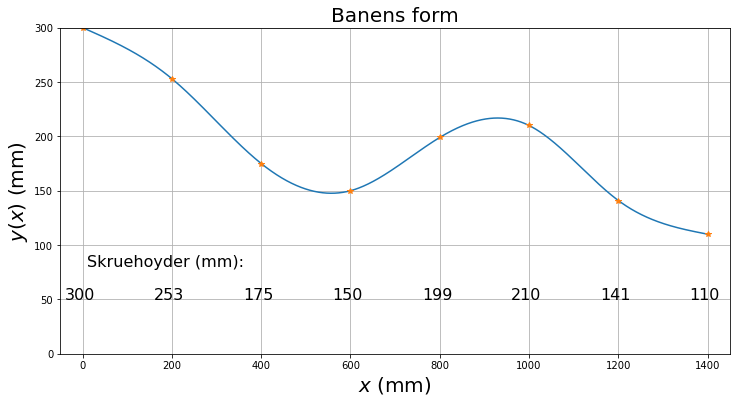

In [573]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehoyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()

Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene.
Horisontal avstand mellom festepunktene er 200 mm.

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

In [574]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngaar R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Hoyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

Hoyeste punkt etter 3.skrue (mm):  217
Laveste punkt etter 2.skrue (mm):  110
Starthelningsvinkel (grader): -10.3
Maksimal helningsvinkel (grader): 22.7
Minste krumningsradius (mm):  328
Festepunkthøyder (mm): [300. 253. 175. 150. 199. 210. 141. 110.]


In [575]:
def v(y): 
  return (np.sqrt((2*g*1000*(300-y))/(7/5)))
print(v(y)[-1], "mm/s")


1631.7825485383419 mm/s


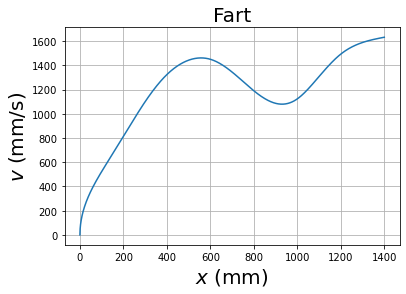

In [576]:
plt.plot(x,v(y))
plt.title('Fart', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$v$ (mm/s)',fontsize=20)


plt.grid()
plt.show()


In [577]:
#Massen til kula
m=0.031

#Sentripitalakselerasjon
def aSentr(y,dy,d2y):
  return 2*(300-y)/(7/5)*d2y/(1+dy**2)**3/2

#Normalkrafta vinkelrett på banenform
def N(beta):
  global y,dy,d2y
  return m*(g*np.cos(beta) + 2*(300-y)/(7/5)*d2y/(1+dy**2)**3/2)

#Akselerasjon tangentielt til banen
def a(beta):
  return -np.sin(beta)*5/7

#Den statiske friksjonkraften
def f(beta):
  return abs(2*m*g*np.sin(beta)/7)

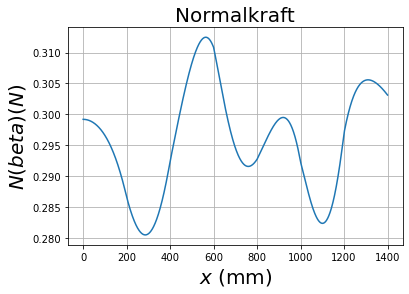

In [578]:
#Plott normalkraft
plt.plot(x,N(beta))
plt.title('Normalkraft', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$N(beta) (N)$',fontsize=20)

plt.grid()
plt.show()



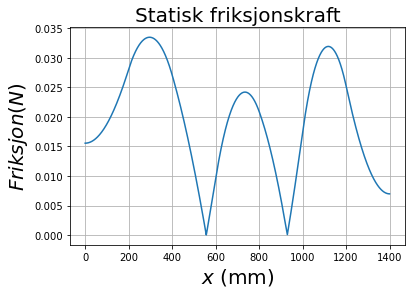

In [579]:

#Plott friksjonskraft
plt.plot(x, f(beta))
plt.title('Statisk friksjonskraft', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$Friksjon (N)$',fontsize=20)

plt.grid()
plt.show()

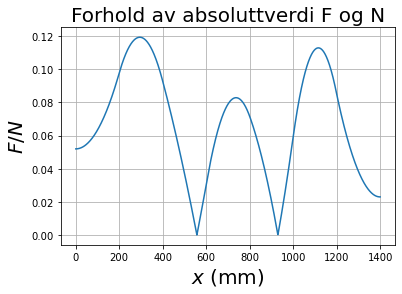

In [580]:
#Forhold mellom friksjon og normalkraft.

def forhold(beta):
    return abs(f(beta)/N(beta))

plt.plot(x, forhold(beta))
plt.title('Forhold av absoluttverdien til F og N', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$F/N$',fontsize=20)

plt.grid()
plt.show()


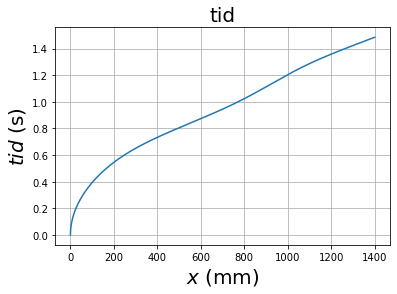

In [581]:

def tid(dx,y):
  t = np.zeros(1401)
  for i in range(1,1401):
    t[i] = (dx / ((v(y)[i]+v(y)[i-1])/2)) + t[i-1]
  return t
plt.plot(x, tid(dx, y))
plt.title('tid', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$tid$ (s)',fontsize=20)

plt.grid()
plt.show()

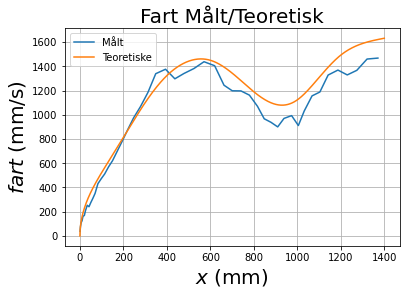

In [582]:
data = pd.read_csv('video1_data.txt', sep=',')
t_list = np.array(data['t'])
y_list = np.array(data['x'])*-1
x_list = (np.array(data['y'])-7.428E-2) *1000 # korrigerer for litt forskyvning i x-aksen og endrer fra meter til mm
v_list = np.array(data['v'])*1000

plt.plot(x_list, v_list, label='Målt')
plt.plot(x, v(y), label="Teoretiske")
plt.title("Fart Målt/Teoretisk", fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$fart$ (mm/s)',fontsize=20)
plt.grid()
plt.legend()
plt.show()

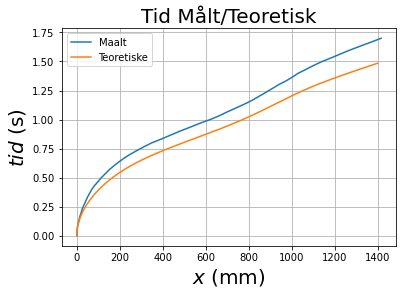

In [583]:
plt.plot(x_list, t_list, label='Maalt')
plt.plot(x, tid(dx, y), label="Teoretiske")
plt.title('Tid Målt/Teoretisk', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$tid$ (s)',fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [584]:
def avik(maalt_verdi,teoretisk_verdi):
  return abs(maalt_verdi-teoretisk_verdi)

def gjenomsnittlig_avik(kin, theory):
    avik_list = []
    for value in kin:
        avik_list.append(avik(value,theory))
    return np.mean(avik_list)

In [585]:
slutt_tid = t_list[len(t_list)-1]
slutt_fart = v_list[len(v_list)-2]
slutt_tid_list = np.array([1.6, 1.667, 1.7, 1.633, slutt_tid, 1.567, 1.667,1.700, 1.6, 1.677])
slutt_fart_list = np.array([slutt_fart/1000, 1.408, 1.417, 1.408, 1.437, 1.417, 1.369, 1.489, 1.420, 1.383])

# Gjennomsnittlig maalte sluttverdier
gjenomsnitt_slutttid = np.mean(slutt_tid_list)
gjenomsnitt_sluttfart = np.mean(slutt_fart_list)
print(gjenomsnitt_sluttfart,"m/s", gjenomsnitt_slutttid,"s")

# Avik
avik_slutt_tid = avik(gjenomsnitt_slutttid,tid(dx,y)[-1])
avik_sluttfart = avik(gjenomsnitt_sluttfart,(v(y)[-1]/1000))
print(avik_slutt_tid,"s", avik_sluttfart,"m/s")

1.4216000000000002 m/s 1.6511000000000002 s
0.16621824187490408 s 0.21018254853834173 m/s


In [596]:
theory_kin = ((1+c)/2)*m*(v(y)[-1]/1000)**2
def total_kinetisk_energi(c,m,v):
    kin_list = []
    for i in v:
        kin_list.append(((1+c)/2)*(m*i**2))
    kin_list = np.array(kin_list)
    return kin_list
print(total_kinetisk_energi(c,m,slutt_fart_list))
print(theory_kin)
print(m*g*(0.3-0.11))


print(gjenomsnittlig_avik(total_kinetisk_energi(c,m,slutt_fart_list),theory_kin))

[0.04676402 0.04301947 0.04357119 0.04301947 0.04480983 0.04357119
 0.04066929 0.04811153 0.04375588 0.04150535]
0.0577809
0.057780899999999996
0.013901178100000005


In [599]:
potE = m*g*(0.3-0.11)
def tap_av_mekanisk_energi(pk,pote):
    tap_list = []
    for i in pk:
        tap_list.append(pote-i)
    tap_list = np.array(tap_list)
    return tap_list
tapmek = tap_av_mekanisk_energi(total_kinetisk_energi(c,m,slutt_fart_list), potE)
print(tapmek)
g_tapmek = np.mean(tapmek)
print(g_tapmek)



[0.01101688 0.01476143 0.01420971 0.01476143 0.01297107 0.01420971
 0.01711161 0.00966937 0.01402502 0.01627555]
0.013901178099999998
